<a href="https://colab.research.google.com/github/nguyenminhkhuong/machine_learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [11]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 



In [12]:
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [13]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [14]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 512.9575 - root_mean_squared_error: 22.6486
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 501.2100 - root_mean_squared_error: 22.3877
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 492.8192 - root_mean_squared_error: 22.1995
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 485.8711 - root_mean_squared_error: 22.0425
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 479.7600 - root_mean_squared_error: 21.9034
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 474.2054 - root_mean_squared_error: 21.7763
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 469.0509 - root_mean_squared_error: 21.6576
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 464.1998 - root_mean_squared_error: 21.5453
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 459.5869 - root_me

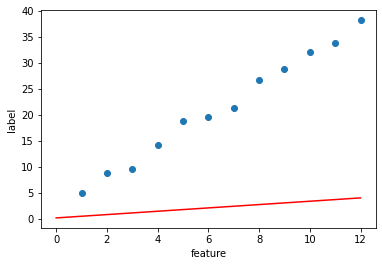

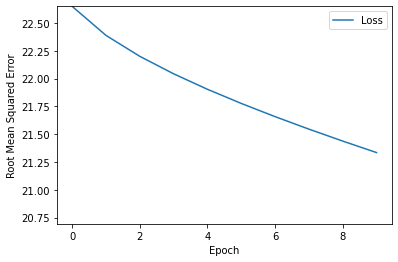

In [15]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 2ms/step - loss: 640.3500 - root_mean_squared_error: 25.3051
Epoch 2/450
1/1 [==============================] - 0s 2ms/step - loss: 627.2153 - root_mean_squared_error: 25.0443
Epoch 3/450
1/1 [==============================] - 0s 1ms/step - loss: 617.8181 - root_mean_squared_error: 24.8559
Epoch 4/450
1/1 [==============================] - 0s 1ms/step - loss: 610.0275 - root_mean_squared_error: 24.6987
Epoch 5/450
1/1 [==============================] - 0s 1ms/step - loss: 603.1685 - root_mean_squared_error: 24.5595
Epoch 6/450
1/1 [==============================] - 0s 1ms/step - loss: 596.9286 - root_mean_squared_error: 24.4321
Epoch 7/450
1/1 [==============================] - 0s 1ms/step - loss: 591.1337 - root_mean_squared_error: 24.3132
Epoch 8/450
1/1 [==============================] - 0s 2ms/step - loss: 585.6756 - root_mean_squared_error: 24.2007
Epoch 9/450
1/1 [==============================] - 0s 1ms/step - loss: 580.4819 

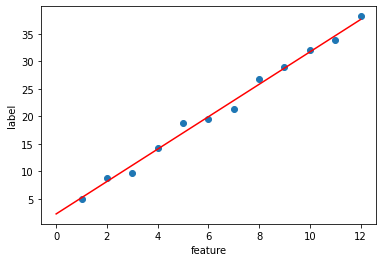

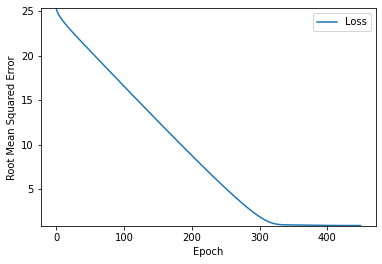

In [17]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 335.6559 - root_mean_squared_error: 18.3209
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 6721458.5000 - root_mean_squared_error: 2592.5776
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 333.5193 - root_mean_squared_error: 18.2625
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.1327 - root_mean_squared_error: 1.4604
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8931 - root_mean_squared_error: 0.9451
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8759 - root_mean_squared_error: 0.9359
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8754 - root_mean_squared_error: 0.9356
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8753 - root_mean

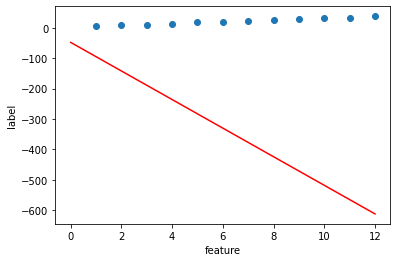

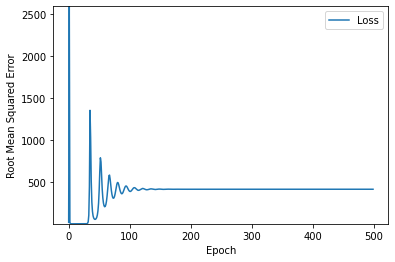

In [18]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 2ms/step - loss: 148.3185 - root_mean_squared_error: 12.1786
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 72.9446 - root_mean_squared_error: 8.5408
Epoch 3/70
1/1 [==============================] - 0s 1ms/step - loss: 40.8640 - root_mean_squared_error: 6.3925
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 23.7633 - root_mean_squared_error: 4.8748
Epoch 5/70
1/1 [==============================] - 0s 1ms/step - loss: 14.0026 - root_mean_squared_error: 3.7420
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 8.3202 - root_mean_squared_error: 2.8845
Epoch 7/70
1/1 [==============================] - 0s 1ms/step - loss: 5.0230 - root_mean_squared_error: 2.2412
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 3.1416 - root_mean_squared_error: 1.7725
Epoch 9/70
1/1 [==============================] - 0s 2ms/step - loss: 2.0956 - root_mean_squared_error: 1

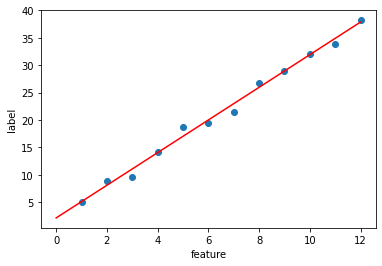

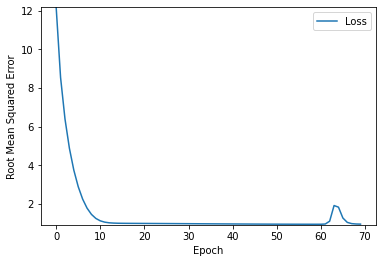

In [19]:
learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 263.5505 - root_mean_squared_error: 16.2342
Epoch 2/125
12/12 [==============================] - 0s 989us/step - loss: 144.7032 - root_mean_squared_error: 12.0293
Epoch 3/125
12/12 [==============================] - 0s 992us/step - loss: 73.6244 - root_mean_squared_error: 8.5805
Epoch 4/125
12/12 [==============================] - 0s 942us/step - loss: 33.0019 - root_mean_squared_error: 5.7447
Epoch 5/125
12/12 [==============================] - 0s 995us/step - loss: 10.9725 - root_mean_squared_error: 3.3125
Epoch 6/125
12/12 [==============================] - 0s 957us/step - loss: 2.8038 - root_mean_squared_error: 1.6744
Epoch 7/125
12/12 [==============================] - 0s 1ms/step - loss: 1.0612 - root_mean_squared_error: 1.0302
Epoch 8/125
12/12 [==============================] - 0s 1ms/step - loss: 1.0847 - root_mean_squared_error: 1.0415
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - lo

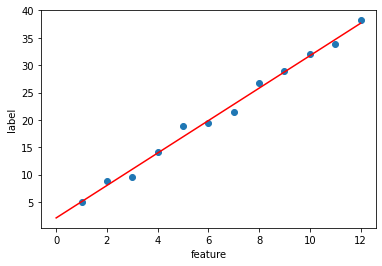

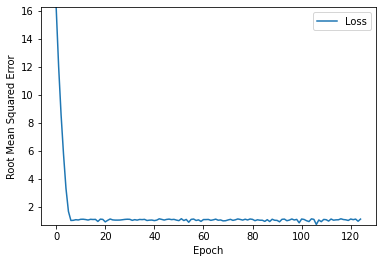

In [20]:
learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)